# Logistic Regression
This week we are going to dive into logistic regression. This is a regression that uses a function that helps us better penalize false positives.

In [38]:
%matplotlib inline
import pandas as pd
from pathlib import Path
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations_with_replacement

project_dir = Path(os.getcwd()).parent
ex2_path = project_dir/'Octave Code'/'ex2'/'ex2data2.txt'
df = pd.read_csv(ex2_path, header=None)

In [39]:
df.columns = ['exam1', 'exam2', 'label']
X = df.loc[:,['exam1', 'exam2']].values
y = df.label.values
df.head()

,exam1,exam2,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [40]:
df.describe()

,exam1,exam2,label
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [41]:
def plot_data(X, y):
    pos_ind = y==1
    neg_ind = y==0
    plt.scatter(X[pos_ind][:,0], X[pos_ind][:,1], color='k',marker='+')
    plt.scatter(X[neg_ind][:,0], X[neg_ind][:,1], color='y')

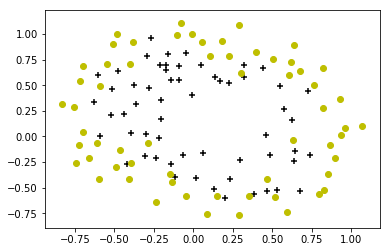

In [42]:
plot_data(X,y)

In [6]:
def sigmoid(x, derivative=False):
    return x * (1 - x) if derivative else 1 / (1 + np.exp(-x))

In [30]:
def cost_function_reg(theta, X, y, lamb):
    m = len(y)
    h_th = sigmoid(np.matmul(X, theta))
    scale = lamb * np.ones_like(theta)
    scale[0, 0] = 0
    l_term = .5 / m * scale * np.sum(theta**2)
    J = ((np.sum(-y * np.log(h_th) -
                 (1 - y) * (np.log(1 - h_th)))) / m +
         (lamb / m) * np.sum(theta**2))
#     J = 1 / m * (np.sum(-y * np.log(h_th)) -
#                  np.sum((1 - y) * np.log(1 - h_th))) + l_term
    grad = 1 / m * np.matmul(X.T, (h_th - y)) + 1 / m * scale * theta
    return J, grad

In [48]:
poly = PolynomialFeatures(6)
X = poly.fit_transform(X[:,0:2])

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [44]:
test_theta = np.ones((X.shape[1], 1))
cost, grad = cost_function_reg(test_theta, X, y, 10)

In [45]:
cost

192.08202523481762

In [46]:
grad

array([[-0.1624295 , -0.1624295 , -0.1624295 , ...,  0.8375705 ,
         0.8375705 ,  0.8375705 ],
       [ 0.11517437,  0.11517437,  0.11517437, ...,  0.16995328,
         0.16995328,  0.16995328],
       [ 0.1031672 ,  0.1031672 ,  0.1031672 , ...,  0.28626876,
         0.28626876,  0.28626876],
       ...,
       [ 0.08334577,  0.08334577,  0.08334577, ...,  0.10593747,
         0.10593747,  0.10593747],
       [ 0.08627642,  0.08627642,  0.08627642, ...,  0.07997461,
         0.07997461,  0.07997461],
       [ 0.08062679,  0.08062679,  0.08062679, ...,  0.20635239,
         0.20635239,  0.20635239]])